In [33]:
# Import
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# First task
dataset = load_wine()

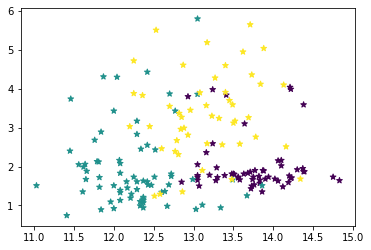

In [35]:
#Second task

#Feature 1:Alcohol
#Feature 2: Malic Acid
y = dataset.target
X = dataset.data[:, :2]

#Representation
plt.scatter(X[:,0], X[:,1], marker='*', c=y)
plt.show()

In [36]:
#Splitting train - test
X_train_validation, X_test, y_train_validation, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)

#Splitting train-validation
X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation,y_train_validation, test_size=2/7, train_size=5/7, random_state=42)

#Checking
print(round(len(X_train)/len(X)*10))
print(round(len(X_test)/len(X)*10))
print(round(len(X_validation)/len(X)*10))

5
3
2


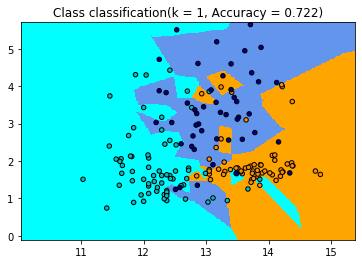

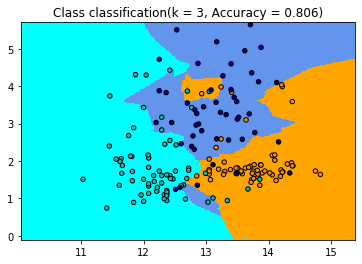

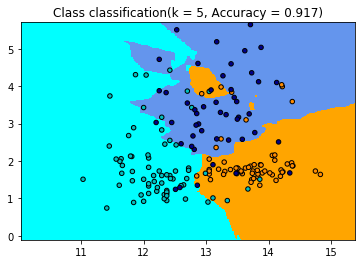

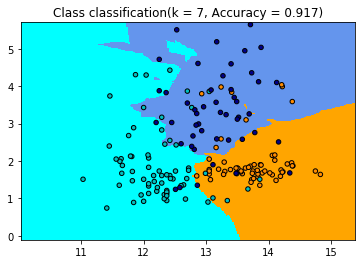

In [37]:
 # Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
h = .02  # step size in the mesh
 
for k in np.arange(1,8,2):
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)

    #Train the model using the training sets
    knn.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = knn.predict(X_validation)
       
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_validation[:, 0].min() - 1, X_validation[:, 0].max() + 1
    y_min, y_max = X_validation[:, 1].min() - 1, X_validation[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()    
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Class KNN classification (k = %i, Accuracy = %s)"
              % (k, round(metrics.accuracy_score(y_validation, y_pred), 3)))

    plt.show()